# Medical Insurance Cost - Machine Learning Project

# Importing Libraries:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading  dataset:

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
data.shape

(1338, 7)

# Top 5 records:

In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Checking for NaN Values (Missing Values):

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#There is no null values in the given data set

# Insights of dataset:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are diff.data types in data set float data type(2), integer data type(2) , Object data type(3).

# Description of dataset (Numerical):

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


A) With the above data all count is equal so there is no null values.

B) Min of age is considered ans 18 for adult below 18 treated as children.

C) For the One who have no children the medical insurance charges will be low.

D) For the One who have atmost all 5 no children medical charges will be high.

E)Here we can identify there is people with High BMI and Low BMI, People with low BMI and High BMI will charge more because 
  of their unhealthy condition and with average BMI treated as healthy and their Insurance cost will be low

# Object data 

In [12]:
data.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Data Preprocessing(Exploratory Data Analysis)

# Histrogram of Medical Insurance Charges:

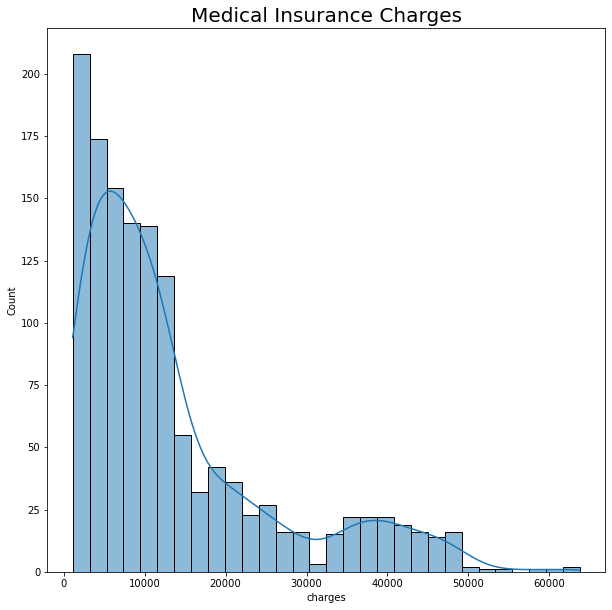

In [13]:
plt.figure(figsize=(10,10))
sns.histplot(data['charges'], kde=True)
plt.title('Medical Insurance Charges', fontsize=20)
plt.show()

#According to Observation below Rs.10000 there is high no of Insurance policies, 

 When the premium increasing the no of policies started decreasing
 
 Finally for the most amount of premium i.e Rs.60000 the no policies are very less
 
 so we have to reduce the Medical Insurance cost in order to Encourage all to take Medical insurance
 
 In order to do so we have to conisder various parameters like age,sex,smoking habits, present health condition and children 

# Boxplot of Medical Insurance Charges: finding outliers

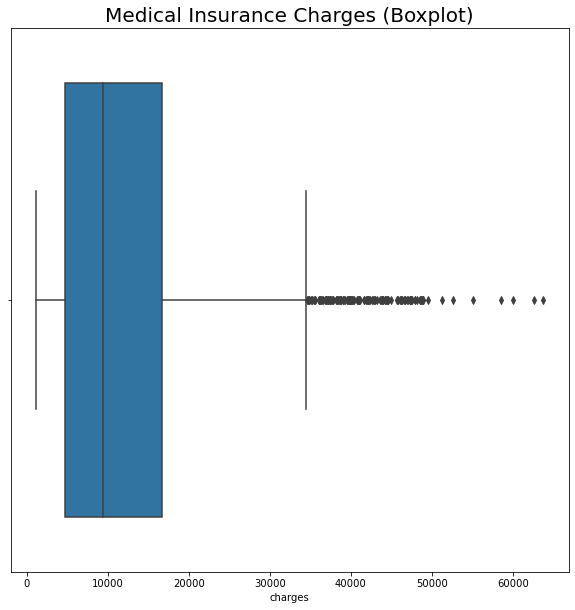

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(data['charges'])
plt.title('Medical Insurance Charges (Boxplot)', fontsize=20)
plt.show()

#There is outliers depending and charges but we can't ignore them or remove them

# Age:

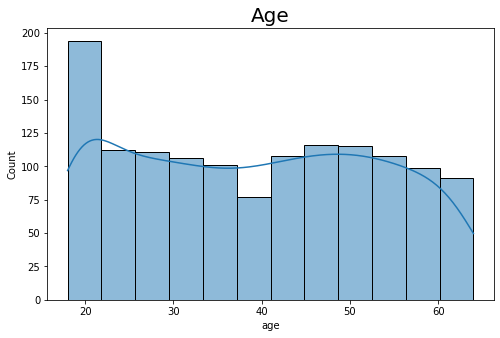

In [15]:
# Histrogram of Age:

plt.figure(figsize=(8,5))
sns.histplot(data['age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

With the above diagrame we understood that in the given data all age groups included almost with same no.

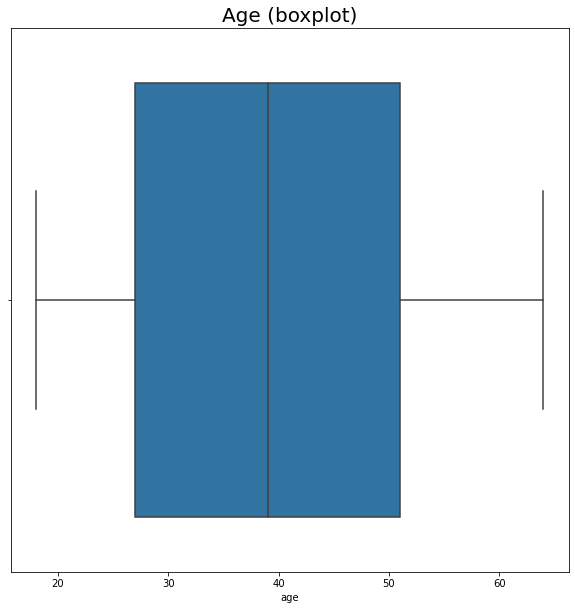

In [16]:
# Boxplot of Age:

plt.figure(figsize=(10,10))
sns.boxplot(data['age'])
plt.title('Age (boxplot)', fontsize=20)
plt.show()

# Body Mass Index:

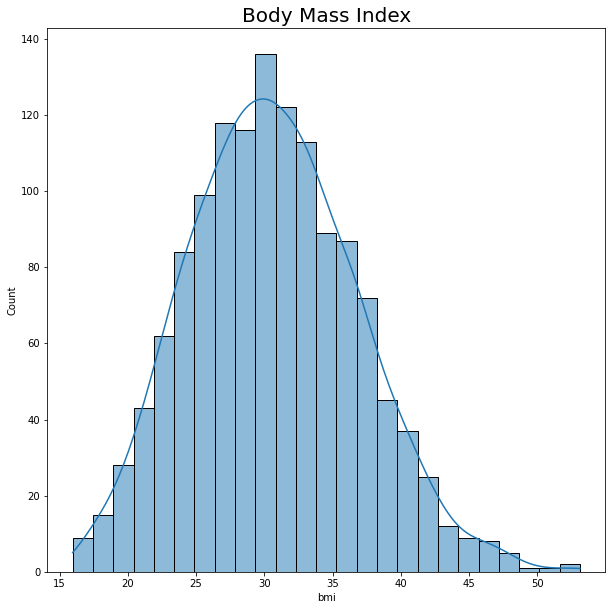

In [17]:
# Histrogram of Body Mass Index:

plt.figure(figsize=(10,10))
sns.histplot(data['bmi'], kde=True)
plt.title('Body Mass Index', fontsize=20)
plt.show()

With this We can estimate the health condition of customer in order to calcutlate their Medical Insurance cost
  

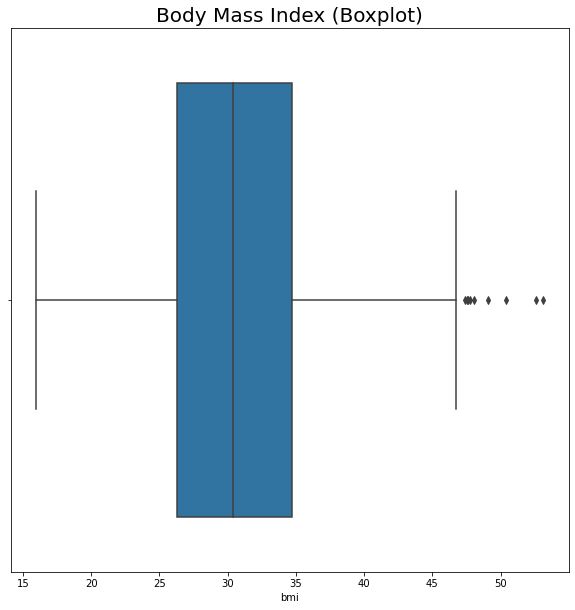

In [18]:
# Boxplot of Body Mass Index:

plt.figure(figsize=(10,10))
sns.boxplot(data['bmi'])
plt.title('Body Mass Index (Boxplot)', fontsize=20)
plt.show()

There is some Outliers but to calculte the cost of Medical insurance hence  removing them

# Removing Outliers

In [19]:
q1=data.quantile(.25)
q3=data.quantile(.75)
iqr=q3-q1

In [20]:
BMI = (q3.bmi+(1.5*iqr.bmi))
BMI

47.290000000000006

In [21]:
index=np.where(data['bmi']>BMI)
index

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

In [22]:
data = data.drop(data.index[index])

In [23]:
data.shape

(1329, 7)

In [24]:
data.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,male,30.970,3,no,northwest,10600.54830
1325,1334,18,female,31.920,0,no,northeast,2205.98080
1326,1335,18,female,36.850,0,no,southeast,1629.83350
1327,1336,21,female,25.800,0,no,southwest,2007.94500


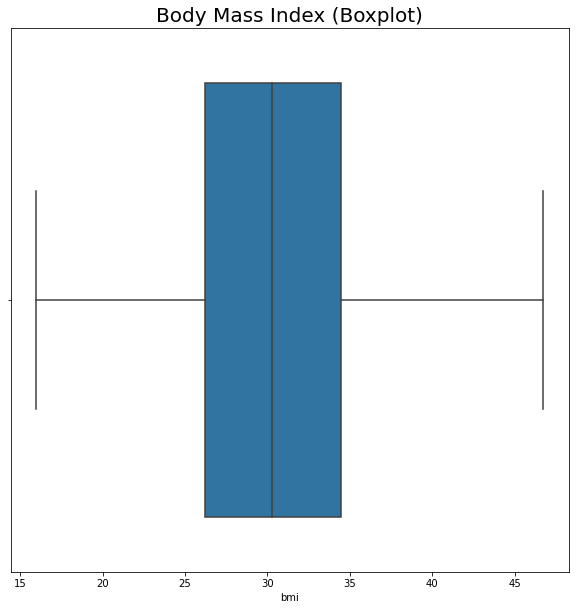

In [25]:
# Boxplot of Body Mass Index:

plt.figure(figsize=(10,10))
sns.boxplot(data['bmi'])
plt.title('Body Mass Index (Boxplot)', fontsize=20)
plt.show()

The data looks better now than before. We will start our analysis with this data now as we don't want to loss important information. If our model doesn't work with accuracy, we will come back for more preprocessing

# children:

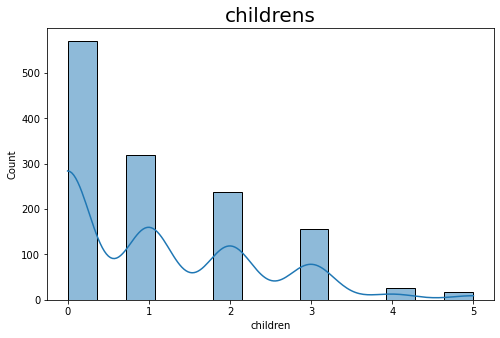

In [26]:
# Histrogram of children:

plt.figure(figsize=(8,5))
sns.histplot(data['children'], kde=True)
plt.title('childrens', fontsize=20)
plt.show()

While Claculting the family Medical insurance the no. of people in family i.e children no. need to consider

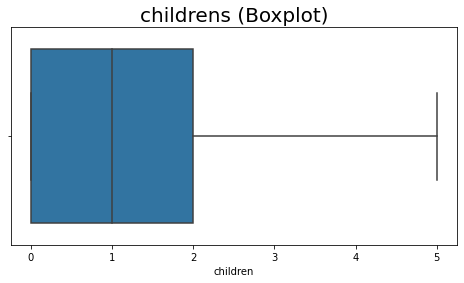

In [27]:
# Boxplot of children:

plt.figure(figsize=(8,4))
sns.boxplot(data['children'])
plt.title('childrens (Boxplot)', fontsize=20)
plt.show()

# Sex:

Male   : 670
Female : 659


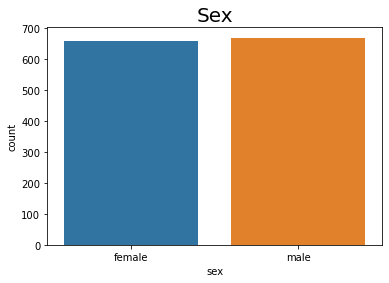

In [28]:
# Value Counts:

print("Male   :", data['sex'].value_counts()[0])
print("Female :", data['sex'].value_counts()[1])

# Visualization:
plt.figure(figsize=(6,4))
sns.countplot(data['sex'])
plt.title('Sex', fontsize=20)
plt.show()

# Smokers:

Smokers     : 271
Non-Smokers : 1058


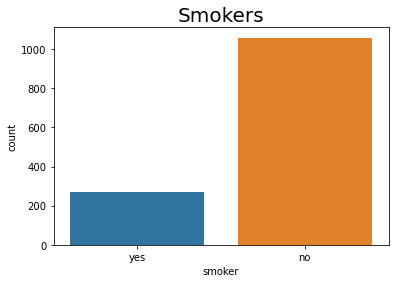

In [29]:
# Value Counts:

print("Smokers     :", data['smoker'].value_counts()[1])
print("Non-Smokers :", data['smoker'].value_counts()[0])

# Visualization:
sns.countplot(data['smoker'])
sns.countplot(data['smoker'])
plt.title('Smokers', fontsize=20)
plt.show()

While calculating the Medical insurance cost we should consider the people smoking habits,
we need charge more charges poeple with smoking habits why because it shows negative impact on their health.

# Region:

South-East region : 357
North-West region : 325
South-West region : 324
North-East region : 323


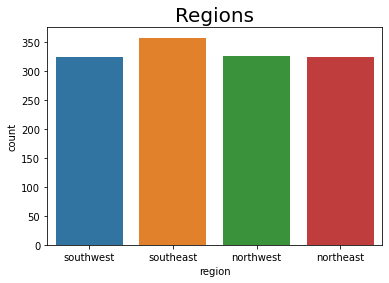

In [30]:
# Value Counts:

print("South-East region :", data['region'].value_counts()[0])
print("North-West region :", data['region'].value_counts()[1])
print("South-West region :", data['region'].value_counts()[2])
print("North-East region :", data['region'].value_counts()[3])

# Visualization:

sns.countplot(data['region'])
sns.countplot(data['region'])
plt.title('Regions', fontsize=20)
plt.show()

# top 5 records:

In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Encoding:

In [32]:
data = pd.get_dummies(data, drop_first=True)

# top 15 records, after encoding:

In [33]:
data.head(15)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


# Columns of dataset:

In [34]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

# Rearranging columns to see better: 

In [35]:
data = data[['age','sex_male','smoker_yes','bmi','children','region_northwest','region_southeast','region_southwest','charges']]
data.head(15)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,19,0,1,27.900,0,0,0,1,16884.92400
1,18,1,0,33.770,1,0,1,0,1725.55230
2,28,1,0,33.000,3,0,1,0,4449.46200
3,33,1,0,22.705,0,1,0,0,21984.47061
4,32,1,0,28.880,0,1,0,0,3866.85520
5,31,0,0,25.740,0,0,1,0,3756.62160
6,46,0,0,33.440,1,0,1,0,8240.58960
7,37,0,0,27.740,3,1,0,0,7281.50560
8,37,1,0,29.830,2,0,0,0,6406.41070
9,60,0,0,25.840,0,1,0,0,28923.13692


# Splitting Independent & Dependent Feature:

In [36]:
X = data.drop(columns=['charges'])
y = data['charges']

In [37]:
# top 2 records of Independent feature:

X.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest
0,19,0,1,27.90,0,0,0,1
1,18,1,0,33.77,1,0,1,0


In [38]:
# top 2 records of Dependent Feature:

y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

# Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.43876391, -1.00831144,  1.97586919, ..., -0.56895095,
        -0.60603956,  1.7612075 ],
       [-1.50997605,  0.99175707, -0.50610638, ..., -0.56895095,
         1.65005729, -0.56779227],
       [-0.79785463,  0.99175707, -0.50610638, ..., -0.56895095,
         1.65005729, -0.56779227],
       ...,
       [-1.50997605, -1.00831144, -0.50610638, ..., -0.56895095,
         1.65005729, -0.56779227],
       [-1.29633963, -1.00831144, -0.50610638, ..., -0.56895095,
        -0.60603956,  1.7612075 ],
       [ 1.55214607, -1.00831144,  1.97586919, ...,  1.75762077,
        -0.60603956, -0.56779227]])

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]

In [42]:
vif["features"] = X.columns
vif

,vif,features
0,1.017899,age
1,1.008977,sex_male
2,1.012968,smoker_yes
3,1.099198,bmi
4,1.004071,children
5,1.518042,region_northwest
6,1.637868,region_southeast
7,1.528484,region_southwest


ALL VIF values are less than 5 and are very low. That means no multicollinearity,now we can go ahead  with fitting our data to the model.Before that, let's split our data in test and training set

# Train Test Split:

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

# Model Building:

# Finding correlation between One to One features in order to predict Medical Insurance Cost

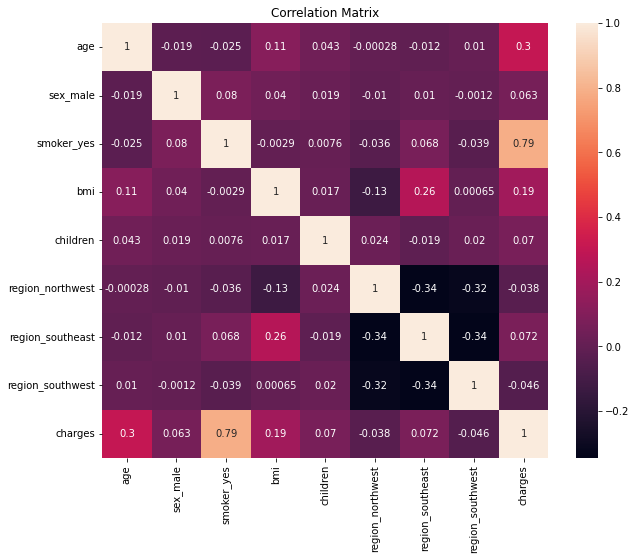

In [44]:
corr_mat = data.corr()
plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.savefig("Correlation_matrix.jpg")
plt.show()

Hence with the above Heatmap we can under stood that:-

    1)The Region where the Customer lives showing Least Coreelation with Medical Insurance Cost.
    2)Smoking Habits of Individual showing Highest Correlation with Medical Insurance Cost.

# Linear Regression:

In [45]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR = LinearRegression()
LR.fit(X_train, y_train)

# Prediction:
y_pred = LR.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))

print(mean_squared_error(y_test, y_pred))


0.6970039454672572
41799583.93636659


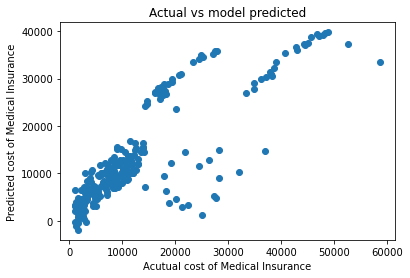

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel('Acutual cost of Medical Insurance')
plt.ylabel('Predicted cost of Medical Insurance')
plt.title('Actual vs model predicted')
plt.show()

# Ridge:

In [47]:

from sklearn.linear_model import Ridge,RidgeCV

ridge = Ridge()
ridge.fit(X_train, y_train)

# Prediction:
y_pred = ridge.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6975982795906828
41717593.03679304


# Ridge Regularization:-

In [48]:
ridgeCV =RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgeCV.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [49]:
ridgeCV.alpha_

0.001

In [50]:
ridge_model = Ridge(alpha=ridgeCV.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.001)

In [51]:
ridge_model.score(X_test,y_test)

0.6970045670223473

With the linear Regression and Ridge Regression my showing same accuracy so the model is not over fitted let's check with Lasso also

# Lasso:

In [52]:

from sklearn.linear_model import Lasso,LassoCV
lass= Lasso()

lass.fit(X_train, y_train)

# Prediction:
y_pred = lass.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6970159922504859
41797922.031799845


# Lasso Regularization

In [53]:
lasscv = LassoCV(alphas=None,max_iter = 999,normalize=True)

lasscv.fit(X_train,y_train)


LassoCV(max_iter=999, normalize=True)

In [54]:
alpha=lasscv.alpha_

alpha

1.465471656972666

In [55]:
lasso_reg = Lasso(alpha = 1.87)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=1.87)

In [56]:
lasso_reg.score(X_test,y_test)

0.6970257413713308

With the Lasso Regularization also my model showing same accuracy so it is not over fitted model

# Random Forest Regressor:

In [57]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Prediction:
y_pred =rf.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8071755556360802
26600945.545652054


Eventhough the RandomforestRegressor showing better result we can't consider as it my exclued Outlier and important Information.Hence it is better to calculate Medical Insurance cost by considering all features with LinearRegression Model

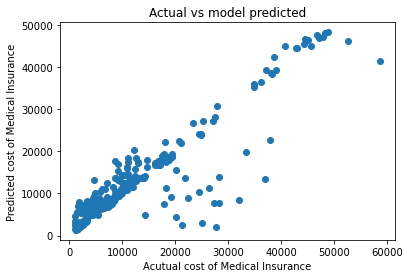

In [58]:
plt.scatter(y_test,y_pred)
plt.xlabel('Acutual cost of Medical Insurance')
plt.ylabel('Predicted cost of Medical Insurance')
plt.title('Actual vs model predicted')
plt.show()

Now we have to check our model accuracy and showing how much residual beween Actual and predicted

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Model Evaluation

In [60]:
mean_absolute_error(y_test,y_pred)

2679.420782320226

In [61]:
np.sqrt(mean_squared_error(y_test,y_pred))

5157.61044919564

# Ada Boost Model Training

In [68]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [69]:
ada = AdaBoostRegressor()

In [70]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [71]:
y_pred=ada.predict(X_train)

In [72]:
accuracy=metrics.r2_score(y_train,y_pred)
print('R Square score',accuracy)

R Square score 0.8251340309091932


In [73]:
y_test_pred = ada.predict(X_test)

In [74]:
accuracy=metrics.r2_score(y_test,y_test_pred)

In [75]:
print('R Square score', accuracy)

R Square score 0.7720319690910743


# Hyper Parameter Tuning using Randomized searchCV

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
params={'n_estimators':[47,50,60,70],
       'learning_rate':[0.25,0.30,0.40]}



In [79]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [81]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=60)

In [88]:
ada=AdaBoostRegressor(learning_rate=0.27,n_estimators=50)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print("***Accuracy post Tuning*******")
print(metrics.r2_score(y_test,y_pred))

***Accuracy post Tuning*******
0.7865816719723968


In [89]:
# Creating a pickle file for the classifier

import pickle
filename = 'Medicalcostinsurance.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))